# Make Image

Example for generating a rest-frame, physical scale image. This example will:
- build a parametric galaxy (see make_sfzh and make_sed)
- define its morphology
- calculate rest-frame luminosities for the UVJ bands
- make an image of the galaxy, including an RGB image.

See the full [imaging examples](../imaging/imaging.rst) for further details.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from unyt import kpc, yr, Myr, mas

from synthesizer.filters import UVJ
from synthesizer.parametric.galaxy import Galaxy
from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh
from synthesizer.parametric.morphology import Sersic2D
from synthesizer.grid import Grid

Define morphology. `r_eff` could be defined in terms of an angle instead.

In [2]:
morph = Sersic2D({'r_eff': 1 * kpc, 'n': 1.})

Define and initialise grid

In [3]:
grid_dir = '../../../tests/test_grid'
grid_name = 'test_grid'
grid = Grid(grid_name, grid_dir=grid_dir)

Define the parameters of the star formation and metal enrichment histories

In [4]:
sfh_p = {'duration': 10 * Myr}
Z_p = {'log10Z': -2.0}  # can also use linear metallicity e.g. {'Z': 0.01}
stellar_mass = 1E8

Define the functional form of the star formation and metal enrichment histories

In [5]:
sfh = SFH.Constant(sfh_p)  # constant star formation
Zh = ZH.deltaConstant(Z_p)  # constant metallicity

Created a BinnedSFZH object containing the 2D star formation and metal enrichment history

In [6]:
sfzh = generate_sfzh(grid.log10ages, grid.metallicities, sfh, Zh, stellar_mass=stellar_mass)

Initialise Galaxy

In [7]:
galaxy = Galaxy(sfzh, morph=morph)

Generate stellar spectra

In [8]:
galaxy.get_spectra_stellar(grid)

Define filter set

In [9]:
filter_collection = UVJ(new_lam=grid.lam)

Generate broadband luminosities

In [10]:
sed = galaxy.spectra['stellar'].get_broadband_luminosities(filter_collection)

Define geometry of images

In [11]:
resolution = 0.1 * kpc  # resolution in kpc
npix = 25  # width of image in pixels

Generate images, returns an Image object which is also associated with the Galaxy

In [12]:
from synthesizer.filters import UVJ
filter_collection = UVJ()

images = galaxy.make_images('stellar', filtercollection=filter_collection,
                            resolution=resolution, npix=npix)

``^^^^"""",,::::;;;;;;;;;;;;;;;;;;::::,,""""^^^^``
^^^^"",,,,::;;;;IIIIllllllllllIIII;;;;::,,,,""^^^^
^^"",,::::;;IIllll!!iiiiiiiiii!!llllII;;::::,,""^^
"",,::::;;IIll!!ii>><<<<<<<<<<>>ii!!llII;;::::,,""
"",,::;;ll!!ii>><<~~++______++~~<<>>ii!!ll;;::,,""
,,::;;II!!ii<<~~__--??]]]]]]??--__~~<<ii!!II;;::,,
::;;IIllii<<++--??[[{{111111{{[[??--++<<iillII;;::
::;;ll!!>>~~--]]}}))||tttttt||))}}]]--~~>>!!ll;;::
;;IIllii<<__??}}))ttrrnnuunnrrtt))}}??__<<iillII;;
;;II!!>>~~--[[))ttxxccYYUUYYccxxtt))[[--~~>>!!II;;
;;llii<<++??{{||rrccJJOOZZOOJJccrr||{{??++<<iill;;
;;llii<<__]]11ttnnYYOOddaaddOOYYnntt11]]__<<iill;;
;;llii<<__]]11ttuuUUZZaa$$aaZZUUuutt11]]__<<iill;;
;;llii<<__]]11ttnnYYOOddaaddOOYYnntt11]]__<<iill;;
;;llii<<++??{{||rrccJJOOZZOOJJccrr||{{??++<<iill;;
;;II!!>>~~--[[))ttxxccYYUUYYccxxtt))[[--~~>>!!II;;
;;IIllii<<__??}}))ttrrnnuunnrrtt))}}??__<<iillII;;
::;;ll!!>>~~--]]}}))||tttttt||))}}]]--~~>>!!ll;;::
::;;IIllii<<++--??[[{{111111{{[[??--++<<iillII;;::
,,::;;II!!ii<<~~__--??]]]]]]??-

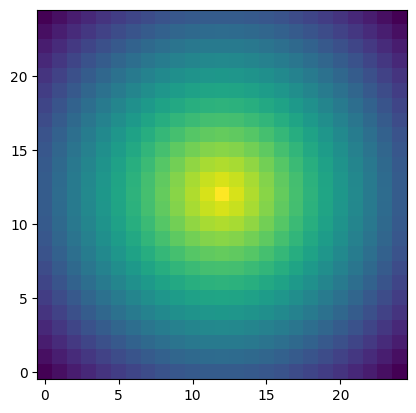

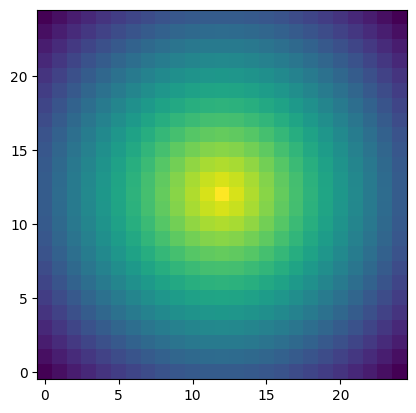

In [13]:
print(images)

images.make_ascii()
images.plot()  #  plot base image
images.plot('U')  #  plot U-band image
# images.plot_rgb(['J', 'V', 'U'])  #  plot RGB image